In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms #give access to popular datasets,arch,and image transformations for CV
import torchvision.datasets as dsets 
from torch.autograd import Variable


# Step1: Load Dataset

In [3]:

train_dataset=dsets.MNIST(root='./data', #saves the data in current working base folder and download data in this data folder
                          train=True,  #this means it is the training dataset
                          transform=transforms.ToTensor(), #remember in pytorch we deal with tensors,so converting dataset to tensor
                          download=True) #must when downloading for first time

In [4]:
len(train_dataset) #this is a list becoz we can do len only on list,there are 60000 different digits

60000

In [5]:
train_dataset[0] #looking thru this dataset,first element in a list

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [6]:
type(train_dataset[0]) #its a tuple with first index having image matrix and second as the label of it

tuple

In [7]:
train_dataset[0][0] #accessing 1st(0) element of 0 index tuple in dataset

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [8]:
#label
train_dataset[0][1] #accessing 2nd[1] element of 0 index tuple in dataset

tensor(5)

In [9]:
#input matrix
train_dataset[0][0].size() #getting tensor size of 1st element of 0 index tuple
#its basically our image of size 28*28 with channel=1 since its grayscale image

torch.Size([1, 28, 28])

In [10]:
#lets see the image 
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [11]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [12]:
show_img=train_dataset[0][0].numpy().reshape(28,28)

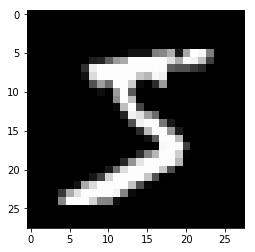

In [13]:
plt.imshow(show_img,cmap='gray')

In [32]:
#label
train_dataset[0][1]

tensor(5)


# Step1b-Loading MNIST Test dataset


In [33]:
test_dataset=dsets.MNIST(root='./data' ,
                         train=False, #putting train=false inorder to get work on test dataset
                         transform=transforms.ToTensor())

In [34]:
len(test_dataset)

10000

In [35]:
type(test_dataset[0]) #everything is as per the train dataset

tuple

# Step 2-Make Dataset Iterable

In [36]:
#just make the dataset iterable

total data: 60000

minibatch:100

Lets say we will do 5 Epochs (1 Epoch:Running through whole dataset once)

Iterations=(total data/minibatch)* No. of Epochs=3000 (1 iteration:1 mini-batch forward and backward pass)

In [37]:
len(train_dataset)

60000

In [38]:
batch_size=100

In [39]:
epochs=5
n_iters=(len(train_dataset)/batch_size)*epochs

In [40]:
#Create Iterable Object:training dataset

In [41]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=batch_size,
                                         shuffle=True) #sequence changes from epoch to epoch

In [42]:
#Check Iterability
import collections
isinstance(train_loader,collections.Iterable) #if something is not iterable it returns false

True

In [43]:
#Create Iterable Object:training dataset

In [44]:
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size,
                                         shuffle=False) #we keep it false here since we will do only one forward pass

In [45]:
#Check Iterability
import collections
isinstance(test_loader,collections.Iterable) #if something is not iterable it returns false

True

# Step 3-Building Model

In [46]:
#same as linear regression since first step in logistic regression is linear regression
class LogisticRegressionModel(nn.Module):
#     input_dim is x and output_dim is y
    def __init__(self,input_dim,output_dim):
        super(LogisticRegressionModel,self).__init__()
        self.Linear=nn.Linear(input_dim,output_dim)
        
    def forward(self,x):
        out=self.Linear(x)
        return out

# Step 4-Instantiate Model CLass

In [47]:
train_dataset[0][0].size()
# flatten this one to 784 so that our model can interpret it

torch.Size([1, 28, 28])

In [48]:
input_dim=28*28 
output_dim=10
model=LogisticRegressionModel(input_dim,output_dim)

# Step 5-Instantiate a loss Class

In [49]:
#For Logistic Regression we use Cross Entropy loss

In [50]:
criterion=nn.CrossEntropyLoss() #Cross Entropy automatically computes probability alongwith cross entropy

# Step 6-Instantiate Optimizer Class

In [51]:
learning_rate=.001
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate) 

# Prameter in Depth

In [52]:
#For Linear Regression it was simple 1D parameter

In [53]:
print(model.parameters())
print(len(list(model.parameters()))) # it returns 2 becoz pytorch considers bias automatically along with other parameters

<generator object Module.parameters at 0x7f4610ebee58>
2


In [54]:
# Wx+B
#(10,784)*(784*1)+(10,1)=(10,1)<--This is the output 
#Parameters:W
print(list(model.parameters())[0].size())
#bias parameter:B
print(list(model.parameters())[1].size())

torch.Size([10, 784])
torch.Size([10])


# Step 7-Train Model

In [55]:
iter=0
for epoch in range(int(epochs)):
    for i,(images,labels) in enumerate(train_loader):
        #load images as Variables
        images=Variable(images.view(-1,28*28))
#         print(images.size())
        labels=Variable(labels)
        
        #Clear Gradients wrt parameters
        optimizer.zero_grad()
        
        #forward pass to get output/logits
        outputs=model(images)
        
        #cal loss:Softmax-->cross entropy loss
        loss=criterion(outputs,labels)
        
        #getting gradients wrt parameters
        loss.backward()
        
        #updating parameters
        optimizer.step()
        
        iter+=1
        
        if iter%500==0:
            #calculate Accuracy
            correct=0
            total=0
            #iterate thru dataset
            for images,labels in test_loader:
                images=Variable(images.view(-1,28*28))
                outputs=model(images)
                
                _,predicted=torch.max(outputs.data,1)
                
                total+=labels.size(0)
                
                correct+=(predicted==labels).sum()
            accuracy=100*correct/total
            
            
            #print(i)
            print('Iterations {}. Loss {}. Acuracy {}.'.format(iter,loss.item(),accuracy))
#print(epoch)

Iterations 500. Loss 1.8781110048294067. Acuracy 64.
Iterations 1000. Loss 1.5624001026153564. Acuracy 75.
Iterations 1500. Loss 1.4899475574493408. Acuracy 79.
Iterations 2000. Loss 1.2313628196716309. Acuracy 81.
Iterations 2500. Loss 1.0622568130493164. Acuracy 82.
Iterations 3000. Loss 0.9608088135719299. Acuracy 82.


# Break Down Accuracy Calculation

In [56]:
iter_test=0
for images,labels in test_loader:
    iter_test+=1
    images=Variable(images.view(-1,28*28))
    outputs=model(images)
    if(iter_test==1):            
        print("Outputs")
        print(outputs)
    _,predicted=torch.max(outputs.data,1)

Outputs
tensor([[-0.3157, -1.1278, -0.5732, -0.1898,  0.0682, -0.4452, -1.0582,  2.9611,
         -0.1814,  0.9543],
        [ 0.2542,  0.1142,  1.6324,  1.3154, -1.5466,  0.4602,  1.3264, -2.0881,
          0.7106, -1.4671],
        [-0.9239,  2.2485,  0.2313,  0.0068, -0.5122, -0.3464, -0.1938, -0.1793,
          0.1924, -0.4935],
        [ 2.6718, -2.3437, -0.0171, -0.2708, -1.0280,  0.4053,  1.1157,  0.3682,
         -0.5918, -0.3382],
        [ 0.1778, -2.1332,  0.3311, -0.6511,  1.7146, -0.3929,  0.0810,  0.2448,
          0.0890,  0.7950],
        [-1.3566,  2.7041,  0.1985,  0.1653, -0.5508, -0.4326, -0.6996, -0.0199,
          0.3870, -0.3548],
        [-1.1490, -1.2940, -1.1332,  0.3644,  1.5149,  0.4308, -0.7292,  0.5520,
          0.4754,  0.9525],
        [-1.3114, -0.4513, -0.7951, -0.2549,  0.8585,  0.3627,  0.1227,  0.0010,
          0.0928,  1.1865],
        [ 0.5914, -0.7058,  0.7514, -1.3098,  0.6309,  0.3088,  0.6554, -1.0635,
         -0.1594,  0.1152],
        [-0

In [57]:
iter_test=0
for images,labels in test_loader:
    iter_test+=1
    images=Variable(images.view(-1,28*28))
    outputs=model(images)
    if(iter_test==1):            
        print("Outputs")
        print(outputs.size())
    _,predicted=torch.max(outputs.data,1)

Outputs
torch.Size([100, 10])


In [58]:
iter_test=0
for images,labels in test_loader:
    iter_test+=1
    images=Variable(images.view(-1,28*28))
    outputs=model(images)
    if(iter_test==1):            
        print("Outputs")
        print(outputs[0,:])
    _,predicted=torch.max(outputs.data,1)

Outputs
tensor([-0.3157, -1.1278, -0.5732, -0.1898,  0.0682, -0.4452, -1.0582,  2.9611,
        -0.1814,  0.9543], grad_fn=<SliceBackward>)


In [59]:
iter_test=0
for images,labels in test_loader:
    iter_test+=1
    images=Variable(images.view(-1,28*28))
    outputs=model(images)         
    _,predicted=torch.max(outputs.data,1)
    if(iter_test==1):   
        print("Prediction")
        print(predicted.size())

Prediction
torch.Size([100])


In [64]:
iter_test=0
for images,labels in test_loader:
    iter_test+=1
    images=Variable(images.view(-1,28*28))
    outputs=model(images)         
    _,predicted=torch.max(outputs.data,1)
    if(iter_test==1):   
        print("Prediction")
        print(predicted[0])

Prediction
tensor(7)


In [67]:
iter_test=0
for images,labels in test_loader:
    iter_test+=1
    images=Variable(images.view(-1,28*28))
    outputs=model(images)         
    _,predicted=torch.max(outputs.data,1)
    if(iter_test==1):   
        print("Prediction")
        print(predicted[0])
              
              
        print("Label Size")
        print(labels.size())
          
        print("Label for Image 0")
        print(labels[0])
       
              

Prediction
tensor(7)
Label Size
torch.Size([100])
Label for Image 0
tensor(7)


In [75]:
total=0
correct=0
iter_test=0
for images,labels in test_loader:
    iter_test+=1
    images=Variable(images.view(-1,28*28))
    outputs=model(images)         
    _,predicted=torch.max(outputs.data,1)
    
    #Total Number of labels
    total+=labels.size(0)
    
    #Total correct Predictions
    correct+=(predicted==labels).sum()
    #correct=correct.numpy()
    correct=correct.item()
accuracy=(correct/total)*100

print(total)
print(correct)
print(accuracy)

10000
8274
82.74000000000001


# Save a model

In [65]:
save_model=False
if save_model is True:
    #saves only parameters
    torch.save(model.state_dict(),"Logistic_model.pkl")